# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading Data

In [2]:
data = pd.read_csv('bank-full.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Analysis of data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [5]:
col = data.columns
col

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [6]:
for i in col:
    print('{:10} {}'.format(i, data[i].nunique()))

age        77
job        12
marital    3
education  4
default    2
balance    7168
housing    2
loan       2
contact    3
day        31
month      12
duration   1573
campaign   48
pdays      559
previous   41
poutcome   4
Target     2


In [7]:
data.shape

(45211, 17)

In [8]:
data.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
Target       False
dtype: bool

# Splitting into X and y, Cleaning / Transforming data 

In [9]:
data = pd.read_csv('bank-full.csv')
X  = data.iloc[:,:-1]
print(X.shape)
y = data.iloc[:,-1]

(45211, 16)


In [10]:
X.shape

(45211, 16)

In [11]:
y.shape

(45211,)

### Problem: as there are too many categorical features converting all of them into dummy variables/ applying one hot encoding will generate too many features, which might lead to addition of noise.

In [12]:
import copy
a = copy.deepcopy(X)

In [13]:
a = pd.get_dummies(a)
a

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [14]:
X.shape

(45211, 16)

In [15]:
a.shape

(45211, 51)

In [16]:
# 51-16 = 35 additional dummy columns are added


### Solution: Instead of converting all values of features into dummy column using OneHotEncoding, WE WILL CONSIDER ONLY TOP FEW VALUES INTO ACCOUNT AND CONVERT THEM INTO DUMMY COLUMN, NOT ALL VALUES

In [17]:
# we will make function which do that work for us

#first of all lets see what should our loop do (considering 'job' column)

#first 
b = copy.deepcopy(X)
top_5 = [x for x in b.job.value_counts().sort_values(ascending=False).head(5).index]
top_5

['blue-collar', 'management', 'technician', 'admin.', 'services']

In [18]:
#second (only converting top 5 values into column)
for label in top_5:
    b[label] = np.where(b['job'] == label, 1, 0)

In [19]:
# this is how 'job' column will get converted (Only top 5 frequent values taken into account)
b[['job']+top_5].head(30)

,job,blue-collar,management,technician,admin.,services
0,management,0,1,0,0,0
1,technician,0,0,1,0,0
2,entrepreneur,0,0,0,0,0
3,blue-collar,1,0,0,0,0
4,unknown,0,0,0,0,0
5,management,0,1,0,0,0
6,management,0,1,0,0,0
7,entrepreneur,0,0,0,0,0
8,retired,0,0,0,0,0
9,technician,0,0,1,0,0


### This will result in fewer columns and less noise. So lets build function which convert all categorical features as such

In [20]:
co = list(X.columns)
co

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [21]:
def transform(data, column, no):
    
    for i in column:
        top = [x for x in X[i].value_counts().sort_values(ascending=False).head(no).index]
        
        for label in top:
            X[label] = np.where(X[i] == label, 1, 0)

In [22]:
print(X.shape)
column = [x for x in co if X[x].dtype == 'object']
transform(X,column,3)

(45211, 16)


In [23]:
X.shape

(45211, 35)

In [24]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,no,yes,cellular,unknown,telephone,may,jul,aug,failure,other
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,0,0,1,0,1,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,0,0,1,0,1,0,0,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,1,0,1,0,1,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,0,0,1,0,1,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,0,0,1,0,1,0,0,0,0


In [25]:
X.drop(column,axis=1,inplace=True)
X

,age,balance,day,duration,campaign,pdays,previous,blue-collar,management,technician,...,no,yes,cellular,unknown,telephone,may,jul,aug,failure,other
0,58,2143,5,261,1,-1,0,0,1,0,...,1,0,0,1,0,1,0,0,0,0
1,44,29,5,151,1,-1,0,0,0,1,...,1,0,0,1,0,1,0,0,0,0
2,33,2,5,76,1,-1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
3,47,1506,5,92,1,-1,0,1,0,0,...,1,0,0,1,0,1,0,0,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,1,...,1,0,1,1,0,0,0,0,0,0
45207,71,1729,17,456,2,-1,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
45208,72,5715,17,1127,5,184,3,0,0,0,...,1,0,1,0,0,0,0,0,0,0
45209,57,668,17,508,4,-1,0,1,0,0,...,1,0,0,1,1,0,0,0,0,0


In [26]:
X.drop(['no','divorced'],axis=1,inplace=True)

In [27]:
X= X.rename(columns={'yes':'default'})

In [28]:
X

,age,balance,day,duration,campaign,pdays,previous,blue-collar,management,technician,...,primary,default,cellular,unknown,telephone,may,jul,aug,failure,other
0,58,2143,5,261,1,-1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,44,29,5,151,1,-1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
2,33,2,5,76,1,-1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
45207,71,1729,17,456,2,-1,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,1,0,0,0,0,0,0,0
45209,57,668,17,508,4,-1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [29]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: Target, Length: 45211, dtype: object

In [30]:
c = list(X.columns)
c

['age',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'blue-collar',
 'management',
 'technician',
 'married',
 'single',
 'secondary',
 'tertiary',
 'primary',
 'default',
 'cellular',
 'unknown',
 'telephone',
 'may',
 'jul',
 'aug',
 'failure',
 'other']

In [31]:
for i in c:
    print('{:10} {}'.format(i, X[i].nunique()))

age        77
balance    7168
day        31
duration   1573
campaign   48
pdays      559
previous   41
blue-collar 2
management 2
technician 2
married    2
single     2
secondary  2
tertiary   2
primary    2
default    2
cellular   2
unknown    2
telephone  2
may        2
jul        2
aug        2
failure    2
other      2


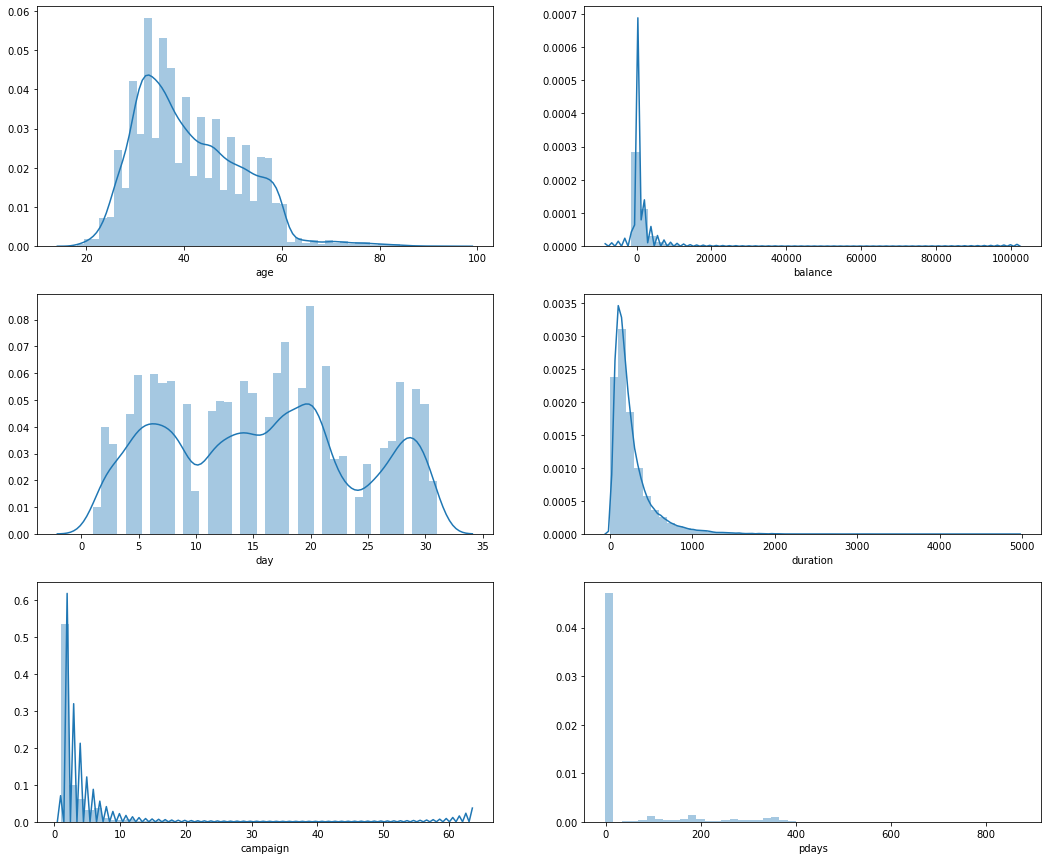

In [32]:
plt.figure(figsize=(18,15))

for i in range(6):
    plt.subplot(3, 2, i+1)
    sns.distplot(X[c[i]])

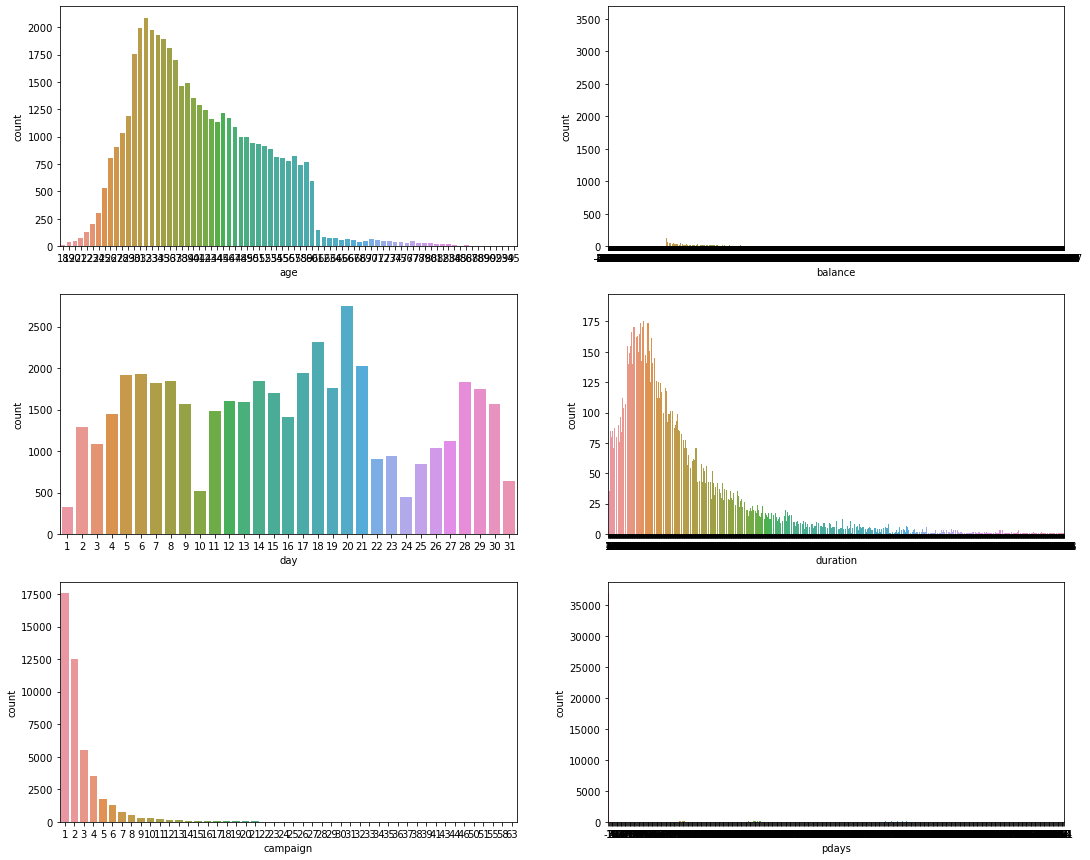

In [54]:
plt.figure(figsize=(18,15))

for i in range(6):
    plt.subplot(3, 2, i+1)
    sns.countplot(X[c[i]], data=X)

# Label encoding y values

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [35]:
y

array([0, 0, 0, ..., 1, 0, 0])

# Train, Test, Split

In [36]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=2)

In [37]:
xtrain.shape

(31647, 24)

In [38]:
ytrain.shape

(31647,)

In [39]:
xtest.shape

(13564, 24)

In [40]:
ytest.shape

(13564,)

# Scaling the data

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

# Algorithms

## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

LogisticRegression()

In [43]:
ypred = lr.predict(xtest)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11999
           1       0.64      0.33      0.44      1565

    accuracy                           0.90     13564
   macro avg       0.78      0.65      0.69     13564
weighted avg       0.89      0.90      0.89     13564



## SVC

In [45]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(xtrain, ytrain)

SVC()

In [46]:
ypred = svc.predict(xtest)

In [47]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     11999
           1       0.68      0.29      0.41      1565

    accuracy                           0.90     13564
   macro avg       0.79      0.64      0.68     13564
weighted avg       0.89      0.90      0.88     13564



## Naive bayes

In [48]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain, ytrain)

GaussianNB()

In [49]:
ypred = nb.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89     11999
           1       0.32      0.50      0.39      1565

    accuracy                           0.82     13564
   macro avg       0.63      0.68      0.64     13564
weighted avg       0.86      0.82      0.84     13564



## KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=14)

In [51]:
ypred = knn.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11999
           1       0.66      0.23      0.34      1565

    accuracy                           0.90     13564
   macro avg       0.79      0.61      0.64     13564
weighted avg       0.88      0.90      0.87     13564



# Ensemble Techniques

## Bagging

In [88]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(n_estimators=16, random_state=3)
bc.fit(xtrain, ytrain)

BaggingClassifier(n_estimators=16, random_state=3)

In [89]:
ypred = bc.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11999
           1       0.57      0.38      0.45      1565

    accuracy                           0.90     13564
   macro avg       0.75      0.67      0.70     13564
weighted avg       0.88      0.90      0.89     13564



## Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier
bc = RandomForestClassifier(n_estimators=16, random_state=3, max_features=2)
bc.fit(xtrain, ytrain)

RandomForestClassifier(max_features=2, n_estimators=16, random_state=3)

In [101]:
ypred = bc.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11999
           1       0.61      0.27      0.37      1565

    accuracy                           0.90     13564
   macro avg       0.76      0.62      0.66     13564
weighted avg       0.88      0.90      0.88     13564

